# Appliance Energy Prediction 

NN Regression

data

https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

## data prep

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")


In [3]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
#drop unecessary columns
data = data.drop(columns=["date"])

In [5]:
#check categorical features
cols = data.columns
num_cols = data._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [6]:
#check nulls
data.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
pd.set_option('display.max_columns', 25)


total = data.isnull().sum()
percent = (data.isnull().sum()\
/data.isnull().count()*100)
pd.concat([total, percent], axis=1, \
keys=['Total', 'Percent']).transpose()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#detect outliers
def detect_outliers(data):

    outliers = {}
    for i in range(data.shape[1]):
        min_t = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
        max_t = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
        count = 0
        for j in data[data.columns[i]]:
            if j < min_t or j > max_t:
                count += 1
        percentage = count / data.shape[0]
        outliers[data.columns[i]] = "%.3f" % percentage

    return outliers

print(detect_outliers(data))

{'Appliances': '0.027', 'lights': '0.033', 'T1': '0.001', 'RH_1': '0.006', 'T2': '0.010', 'RH_2': '0.007', 'T3': '0.003', 'RH_3': '0.001', 'T4': '0.000', 'RH_4': '0.000', 'T5': '0.001', 'RH_5': '0.029', 'T6': '0.005', 'RH_6': '0.000', 'T7': '0.000', 'RH_7': '0.001', 'T8': '0.000', 'RH_8': '0.000', 'T9': '0.000', 'RH_9': '0.000', 'T_out': '0.005', 'Press_mm_hg': '0.005', 'RH_out': '0.008', 'Windspeed': '0.005', 'Visibility': '0.002', 'Tdewpoint': '0.000', 'rv1': '0.000', 'rv2': '0.000'}


In [9]:
#train test split
#split, then over sample for train then you can fit scaler and scale
#doing it any other way creates data leakage
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

from sklearn.model_selection import train_test_split

x_new, x_test_2, y_new, y_test_2 = train_test_split(X, Y, test_size=0.2, random_state=0)
dev_per = x_test_2.shape[0]/x_new.shape[0]
x_train_2, x_dev_2, y_train_2, y_dev_2 = train_test_split(x_new, y_new, test_size=dev_per, random_state=0)

print(x_train_2.shape, y_train_2.shape)
print(x_dev_2.shape, y_dev_2.shape)
print(x_test_2.shape, y_test_2.shape)

x_train_2.shape[1]

(11841, 27) (11841,)
(3947, 27) (3947,)
(3947, 27) (3947,)


27

In [10]:
#scale data
x_dev_2_scaled = (x_dev_2 - x_train_2.min()) / (x_train_2.max() - x_train_2.min())
x_test_2_scaled = (x_test_2 - x_train_2.min()) / (x_train_2.max() - x_train_2.min())
x_train_2_scaled = (x_train_2 - x_train_2.min()) / (x_train_2.max() - x_train_2.min())



## neural net

In [11]:
import torch
import torch.nn as nn

In [12]:
x_train = torch.tensor(x_train_2.values).float()
y_train = torch.tensor(y_train_2.values).float()
x_dev = torch.tensor(x_dev_2.values).float()
y_dev = torch.tensor(y_dev_2.values).float()
x_test = torch.tensor(x_test_2.values).float()
y_test = torch.tensor(y_test_2.values).float()

In [13]:
import torch
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 128)
        self.hidden_2 = nn.Linear(128, 128)
        self.hidden_3 = nn.Linear(128, 64)
        self.hidden_4 = nn.Linear(64, 64)#increased hidden layers and size of hidden layers
        self.hidden_5 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 1)       
        
        self.dropout = nn.Dropout(p=0.05)
        
    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = F.relu(self.hidden_2(z))
        z = self.dropout(F.relu(self.hidden_3(z)))
        z = self.dropout(F.relu(self.hidden_4(z)))
        z = self.dropout(F.relu(self.hidden_5(z)))
        out = self.output(z)
        
        return out

In [14]:
model = Classifier(x_train.shape[1])
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


batch_size = 256
epochs = 200

In [15]:
model.parameters()

<generator object Module.parameters at 0x7f299fe75190>

In [16]:
from sklearn.utils import shuffle


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []

for e in range(epochs):
    X_, y_ = shuffle(x_train, y_train)
    running_loss = 0
    running_mape = 0
    iterations = 0
    
    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = X_[i:b]
        y_batch = y_[i:b]
        pred = model(X_batch).squeeze()
        loss = criterion(pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        pred_dev = model(x_dev)
        dev_loss = criterion(pred_dev, y_dev)

    train_losses.append(running_loss/iterations)
    dev_losses.append(dev_loss)


    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/iterations),
          "Validation Loss: {:.3f}.. ".format(dev_loss))



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([3947])) that is different to the input size (torch.Size([3947, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/200..  Training Loss: 12251.800..  Validation Loss: 10732.311.. 
Epoch: 2/200..  Training Loss: 10295.974..  Validation Loss: 10725.896.. 
Epoch: 3/200..  Training Loss: 10158.049..  Validation Loss: 10738.697.. 
Epoch: 4/200..  Training Loss: 10095.563..  Validation Loss: 10793.173.. 
Epoch: 5/200..  Training Loss: 9973.812..  Validation Loss: 10856.418.. 
Epoch: 6/200..  Training Loss: 9745.895..  Validation Loss: 10968.576.. 
Epoch: 7/200..  Training Loss: 9587.890..  Validation Loss: 11249.522.. 
Epoch: 8/200..  Training Loss: 9631.751..  Validation Loss: 11256.433.. 
Epoch: 9/200..  Training Loss: 9457.729..  Validation Loss: 11453.407.. 
Epoch: 10/200..  Training Loss: 9519.329..  Validation Loss: 11586.476.. 
Epoch: 11/200..  Training Loss: 9542.437..  Validation Loss: 11400.044.. 
Epoch: 12/200..  Training Loss: 9494.955..  Validation Loss: 11594.219.. 
Epoch: 13/200..  Training Loss: 9498.548..  Validation Loss: 11557.648.. 
Epoch: 14/200..  Training Loss: 9528.809.. 

In [17]:
pred = model(x_test[0])
print("Ground truth:", y_test[0].item(), \
"Prediction:",pred.item())

Ground truth: 290.0 Prediction: 228.97901916503906


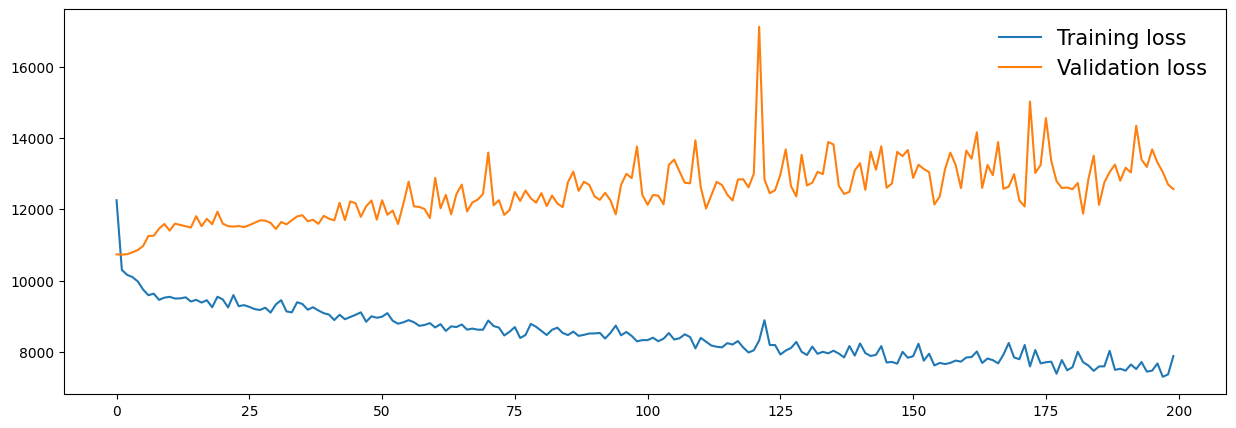

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.plot(train_losses, label='Training loss')
plt.plot(dev_losses, label='Validation loss')
plt.legend(frameon=False, fontsize=15)
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_percentage_error

print("mape for test")
pred = model(x_test).squeeze().detach().numpy()
mean_absolute_percentage_error(y_test, pred)



mape for test


0.3917009